In [2]:
 pip install emoji

  Using cached emoji-2.12.1-py3-none-any.whl (431 kB)


In [3]:
import regex as re
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# % matplotlib inline

In [4]:
def startsWithDateAndTime(s):
    pattern = r"[\d]{1,2}/[\d]{1,2}/[\d]{4}" #, r"([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -" # [\d]{1,2}/[\d]{1,2}/[\d]{4} ^([0-9]+)(\/)([0-9]+)(\/)([0-9]+)
    result = re.findall(pattern, s)
    print("result :", result)
    if result:
        return True
    else:
        False

In [5]:
def FindAuthor(s):
    s=s.split(":")
    if len(s)==2:
        return True
    else:
        return False

In [6]:
def getDataPoint(line):
    splitLine = line.split(' - ')
    dateTime = splitLine[0]
    date, time = dateTime.split(', ')
    message = ' '.join(splitLine[1:])
    if FindAuthor(message):
        splitMessage = message.split(': ')
        author = splitMessage[0]
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [7]:
import re

def startsWithDateAndTime(s):
    # Regular expression pattern to match date and time at the beginning of a line
    pattern = r'^\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{2} [AP]M -'
    result = re.match(pattern, s)
    return bool(result)

def getDataPoint(line):
    # Splitting the line into date, time, author, and message
    splitLine = line.split(' - ')
    dateTime = splitLine[0]
    date, time = dateTime.split(', ')
    message = ' '.join(splitLine[1:])
    if ':' in message:
        splitMessage = message.split(': ')
        author = splitMessage[0]
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [8]:
from google.colab import files

# uploaded = files.upload()
parsedData = []  # List to keep track of data so it can be used by a Pandas dataframe
conversation = "/content/WhatsApp Chat with CSE ROCK🎸STAR🌟 2012💖2015.txt"  # path for the whatsapp text file
with open(conversation, encoding="utf-8") as fp:

    fp.readline()  # Skipping first line of the file because contains information related to something about end-to-end encryption
    print("fp.readline() : \n", fp.readline())
    messageBuffer = []
    print("messageBuffer : \n", messageBuffer)
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        print("line: \n", line)
        if startsWithDateAndTime(line):
            print("startsWithDateAndTime : \n", startsWithDateAndTime)
            if len(messageBuffer) > 0:
                parsedData.append([date, time, author, ' '.join(messageBuffer)])
                messageBuffer.clear()
            date, time, author, message = getDataPoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)



fp.readline() : 
 9/25/15, 11:50 - You were added

messageBuffer : 
 []
line: 
 7/12/22, 18:46 - Rupesh2: <Media omitted>
line: 
 7/12/22, 18:46 - Rupesh2: <Media omitted>
line: 
 8/7/22, 12:09 - +91 70007 15200: <Media omitted>
line: 
 8/7/22, 12:58 - Yogendre Poly: <Media omitted>
line: 
 8/7/22, 13:36 - Rupesh2: HAPPY HAPPY FRIENDSHIP DAY ME CSE KE MITRO...💐💐💐💐💐💐😊😊😊😊
line: 
 8/7/22, 13:39 - Ajay Poly: *मित्रता दिवस की  हार्दिक शुभकामनाएँ मित्रों...*
line: 
 8/7/22, 14:10 - Monika Rani: <Media omitted>
line: 
 8/7/22, 14:25 - Ambilkar: Happy Friendship Day Friends 💐💐💐🥳🥳🥳
line: 
 8/11/22, 11:44 - +91 70007 15200: <Media omitted>
line: 
 *मृदुल स्नेह अटूट विश्वास और समर्पण से परिपूर्ण भाई बहन के पावन पर्व रक्षाबंधन की सभी को हार्दिक बधाई*
line: 
 8/21/22, 19:05 - +91 70007 15200: https://youtu.be/l7ol99k5EO0
line: 
 8/21/22, 19:06 - +91 70007 15200: Nanda Jaahi hamar teej Tihar.... apne aane wale generation ko iska Gyaan jrur deve
line: 
 8/28/22, 20:47 - +91 70007 15200: तीजा मनाए मईक

In [9]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])
df.tail(20)

,Date,Time,Author,Message


In [10]:
df.Author.unique()

array([], dtype=object)

In [11]:
import pandas as pd
import re
import emoji
import numpy as np

# Sample DataFrame creation (replace this with your actual DataFrame)
data = {'Message': ['Hello 😊', '<Media omitted>', 'Check this out: https://example.com']}
df = pd.DataFrame(data)

# Counting media messages
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]

# Function to split and count emojis
def split_count(text):
    emoji_list = [emoji.demojize(e) for e in emoji.distinct_emoji_list(text)]
    return emoji_list

# Applying the function to count emojis
df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())

# Counting links
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

# Printing results
print("Media:", media_messages)
print("Emojis:", emojis)
print("Links:", links)


Media: 1
Emojis: 1
Links: 1


In [12]:
import pandas as pd
import numpy as np
import re
import emoji

# Sample DataFrame creation (replace this with your actual DataFrame)
data = {'Author': ['Alice', 'Bob', 'Alice', 'Bob', '<Media omitted>'],
        'Message': ['Hello 😊', 'How are you?', 'Check this out: https://example.com', 'I\'m good, thanks!', '<Media omitted>']}
df = pd.DataFrame(data)

# Counting media messages and creating a separate DataFrame for them
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)

# Adding columns for letter count, word count, and initializing message count
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s: len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s: len(s.split(' ')))
messages_df["MessageCount"] = 1

# List of authors in the group
authors = messages_df['Author'].unique()

# Iterating through each author and calculating statistics
for author in authors:
    # Filtering out messages of a particular author
    req_df = messages_df[messages_df["Author"] == author]

    # Calculating statistics for the author
    print(f'\nStats of {author} -')
    print('Messages Sent:', req_df.shape[0])
    words_per_message = (np.sum(req_df['Word_Count'])) / req_df.shape[0]
    print('Words per message:', words_per_message)
    media = media_messages_df[media_messages_df['Author'] == author].shape[0]
    print('Media Messages Sent:', media)
    emojis = sum(req_df['Message'].apply(lambda s: emoji.emoji_count(s)))

    print('Emojis Sent:', emojis)
    links = sum(req_df['Message'].apply(lambda s: len(re.findall(r'(https?://\S+)', s))))
    print('Links Sent:', links)



Stats of Alice -
Messages Sent: 2
Words per message: 3.0
Media Messages Sent: 0
Emojis Sent: 1
Links Sent: 1

Stats of Bob -
Messages Sent: 2
Words per message: 3.0
Media Messages Sent: 0
Emojis Sent: 0
Links Sent: 0


In [13]:
import pandas as pd
from collections import Counter
import emoji

# Sample DataFrame creation
data = {'Author': ['Alice', 'Bob', 'Alice', 'Bob', '<Media omitted>'],
        'Message': ['Hello 😊', 'How are you?', 'Check this out: https://example.com', 'I\'m good, thanks!', '<Media omitted>']}
messages_df = pd.DataFrame(data)

# Extract emojis from messages
messages_df['Emojis'] = messages_df['Message'].apply(lambda s: [e['emoji'] for e in emoji.emoji_list(s)])

# Create a list of all emojis
total_emojis_list = list([a for b in messages_df['Emojis'] for a in b])

# Count the frequency of each emoji
emoji_dict = dict(Counter(total_emojis_list))

# Sort the emojis by frequency
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted emojis and their counts
for i in emoji_dict:
    print(i)

('😊', 1)


There are 90 words in all the messages.


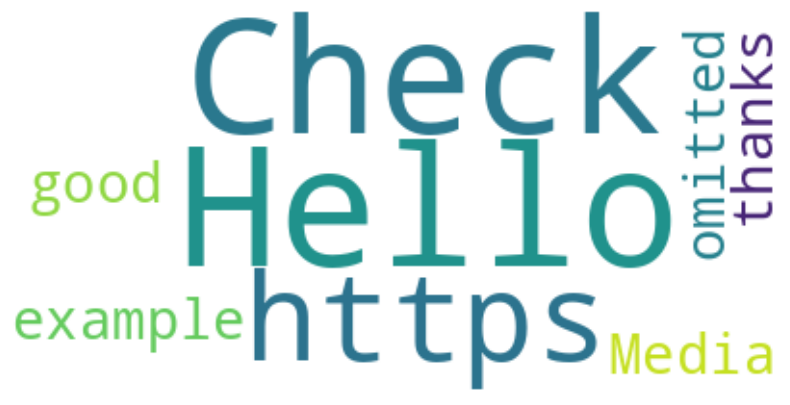

In [14]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
pip install pandas matplotlib wordcloud


Author name: a


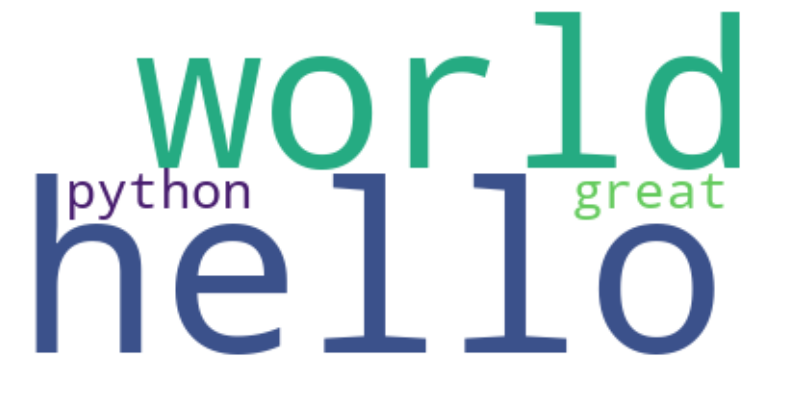

Author name: b


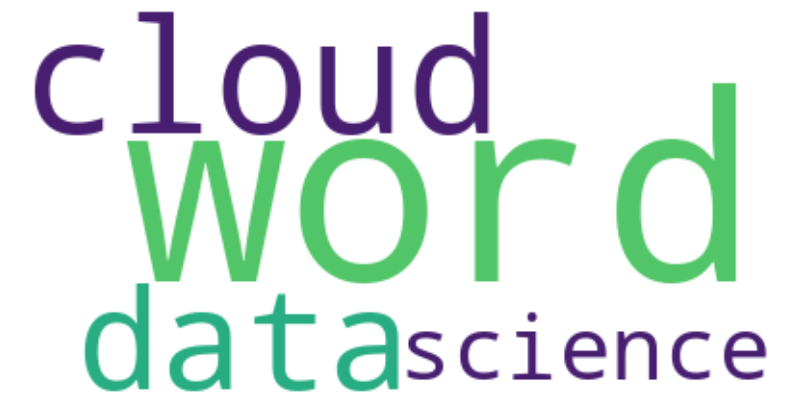

Author name: c


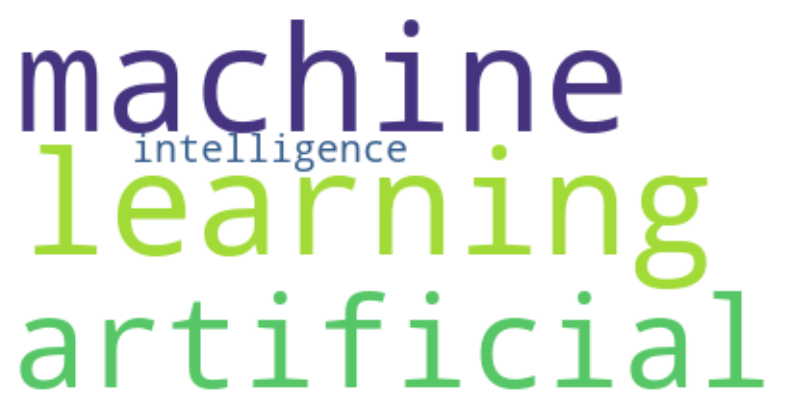

In [16]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Sample DataFrame creation (you should replace this with your actual DataFrame)
data = {'Author': ['a', 'a', 'b', 'b', 'c', 'c'],
        'Message': ['hello world', 'python is great', 'word cloud', 'data science', 'machine learning', 'artificial intelligence']}
messages_df = pd.DataFrame(data)

# List of authors
l = ['a', 'b', 'c']

# Generate and display word clouds for each author
for i in range(len(l)):
    dummy_df = messages_df[messages_df['Author'] == l[i]]
    text = " ".join(review for review in dummy_df.Message)
    stopwords = set(STOPWORDS)
    # Generate a word cloud image
    print('Author name:', l[i])
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    # Display the generated image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()